In [1]:
import pandas as pd
import boto3
import os
from pathlib import Path

In [2]:
# Downloading data from s3 bucket.
# from pathlib import Path
# ECG_DATA_BUCKET = "ritesh-s3-ecg-annotated-data"
# s3 = boto3.client("s3")
# for fl in lst_images:
#     fn = Path(fl).name
#     print(fn
#     s3.download_file(ECG_DATA_BUCKET,fn,f'./ecg-annotated-data/{fn}')

In [3]:
new_file_name = 'project-6-at-2021-10-18-12-08-f8b59d09.csv'
df_labels = pd.read_csv(new_file_name); df_labels.head()

,image,id,choice,comment,annotator,annotation_id,created_at,updated_at,lead_time
0,/data/local-files/?d=home/ubuntu/labeling/ecg-...,3598,Normal,ST changes in v2 and v3 is normal variant,ashadevi.jagarlamudi@hcl.com,312,2021-10-13T13:13:16.535981Z,2021-10-13T13:13:50.686726Z,435273.940
1,/data/local-files/?d=home/ubuntu/labeling/ecg-...,3580,Others,"{""text"": [""Fascicular block is evident. "", ""No...",ashadevi.jagarlamudi@hcl.com,294,2021-10-11T16:10:12.062425Z,2021-10-11T16:10:37.532522Z,273077.032
2,/data/local-files/?d=home/ubuntu/labeling/ecg-...,3577,Others,"T wave flattening in inferior leads, it is non...",ashadevi.jagarlamudi@hcl.com,291,2021-10-11T16:05:37.430058Z,2021-10-11T16:06:25.680923Z,272825.178
3,/data/local-files/?d=home/ubuntu/labeling/ecg-...,3530,Others,Low Voltage in the EKG. This could be suggesti...,ashadevi.jagarlamudi@hcl.com,244,2021-10-08T13:03:48.405205Z,2021-10-08T13:03:54.071083Z,2674.445
4,/data/local-files/?d=home/ubuntu/labeling/ecg-...,3500,Left Ventricular Hypertropy,Left Axis Deviation confirmed by: Positive de...,triveni.dumpa@hcl.com,184,2021-09-23T16:37:51.083412Z,2021-09-23T16:40:21.143072Z,15007.738


In [4]:
lst_images = df_labels['image']

In [5]:
len(os.listdir("./ecg-annotated-data"))

358

In [6]:
# Label cleansing required a bit
df_labels['choice'].value_counts()

Normal                                                                     188
Others                                                                      94
Myocardial Infarction                                                       21
Left Ventricular Hypertropy                                                 13
Left Atrial Enlargement                                                      9
Ischemia                                                                     8
{"choices": ["Ischemia", "Others"]}                                          5
Right Bundle Branch Block                                                    4
{"choices": ["Ischemia", "Left Ventricular Hypertropy"]}                     4
{"choices": ["Myocardial Infarction", "Others"]}                             3
{"choices": ["Myocardial Infarction", "Left Ventricular Hypertropy"]}        2
{"choices": ["Ischemia", "Left Atrial Enlargement"]}                         2
Left Bundle Branch Block                            

In [7]:
def cleanse_labels(str_labels):
    try:
        str_labels = str_labels.replace('"choices":', "").replace('{ ["','').replace('"]}','').replace('"', '').replace(", ", ";")
    except:
        pass
    return(str_labels)

In [8]:
df_labels['labels'] = list(map(cleanse_labels, df_labels['choice']))

In [9]:
df_labels['labels'].value_counts()

Normal                                                 188
Others                                                  94
Myocardial Infarction                                   21
Left Ventricular Hypertropy                             13
Left Atrial Enlargement                                  9
Ischemia                                                 8
Ischemia;Others                                          5
Right Bundle Branch Block                                4
Ischemia;Left Ventricular Hypertropy                     4
Myocardial Infarction;Others                             3
Myocardial Infarction;Left Ventricular Hypertropy        2
Ischemia;Left Atrial Enlargement                         2
Left Bundle Branch Block                                 1
Right Atrial Enlargement                                 1
Myocardial Infarction;Right Ventricular Hypertropy       1
Left Ventricular Hypertropy;Left Atrial Enlargement      1
Left Atrial Enlargement;Others                          

In [10]:
# Considering Normal Others and Myocardial Infarction.

In [11]:
df_training_labels =  df_labels[df_labels['labels'].isin(['Normal','Others','Myocardial Infarction'])].reset_index()

In [12]:
df_training_labels['labels'].value_counts()

Normal                   188
Others                    94
Myocardial Infarction     21
Name: labels, dtype: int64

In [13]:
df_training_labels.shape

(303, 11)

In [14]:
! pip install fastai==2.3.1

In [15]:
import fastai

In [16]:
from fastai.vision.all import *

In [17]:
df_training_labels.head()

,index,image,id,choice,comment,annotator,annotation_id,created_at,updated_at,lead_time,labels
0,0,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201103-090540-1035.pdf.jpg,3598,Normal,ST changes in v2 and v3 is normal variant,ashadevi.jagarlamudi@hcl.com,312,2021-10-13T13:13:16.535981Z,2021-10-13T13:13:50.686726Z,435273.940,Normal
1,1,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201014-075943-977.pdf.jpg,3580,Others,"{""text"": [""Fascicular block is evident. "", ""Non specific T wave changes. Have to look in to patients history.""]}",ashadevi.jagarlamudi@hcl.com,294,2021-10-11T16:10:12.062425Z,2021-10-11T16:10:37.532522Z,273077.032,Others
2,2,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201104-114447-1041.pdf.jpg,3577,Others,"T wave flattening in inferior leads, it is non specific finding.",ashadevi.jagarlamudi@hcl.com,291,2021-10-11T16:05:37.430058Z,2021-10-11T16:06:25.680923Z,272825.178,Others
3,3,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201201-124218-1205.pdf.jpg,3530,Others,Low Voltage in the EKG. This could be suggesting infiltrative cardiomyopathy,ashadevi.jagarlamudi@hcl.com,244,2021-10-08T13:03:48.405205Z,2021-10-08T13:03:54.071083Z,2674.445,Others
4,6,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20210128-134038-66.pdf.jpg,3390,Normal,NaN,ashadevi.jagarlamudi@hcl.com,93,2021-09-08T18:54:51.617102Z,2021-09-08T18:59:08.073580Z,23495.349,Normal


In [18]:
# fx = '/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201103-090540-1035.pdf.jpg'
# Path('ecg-annotated-data/' + Path(fx).name)

In [19]:
def get_name_of_file(x):
    return(Path(x).name)

In [20]:
df_training_labels['image_name'] = list(map(get_name_of_file, df_training_labels['image']))

In [21]:
def get_training_files(path = './ecg-annotated-data'):
    fnames = get_image_files(path)
    training_files = []
    for f in fnames:
        df_res =  df_training_labels[df_training_labels['image_name'] ==  Path(f).name]
        if df_res.shape[0] == 1:
            training_files.append(f)
    return(training_files)

In [22]:
ft = get_training_files()

In [23]:
len(ft)

291

In [24]:
df_training_labels.head()

,index,image,id,choice,comment,annotator,annotation_id,created_at,updated_at,lead_time,labels,image_name
0,0,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201103-090540-1035.pdf.jpg,3598,Normal,ST changes in v2 and v3 is normal variant,ashadevi.jagarlamudi@hcl.com,312,2021-10-13T13:13:16.535981Z,2021-10-13T13:13:50.686726Z,435273.940,Normal,20201103-090540-1035.pdf.jpg
1,1,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201014-075943-977.pdf.jpg,3580,Others,"{""text"": [""Fascicular block is evident. "", ""Non specific T wave changes. Have to look in to patients history.""]}",ashadevi.jagarlamudi@hcl.com,294,2021-10-11T16:10:12.062425Z,2021-10-11T16:10:37.532522Z,273077.032,Others,20201014-075943-977.pdf.jpg
2,2,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201104-114447-1041.pdf.jpg,3577,Others,"T wave flattening in inferior leads, it is non specific finding.",ashadevi.jagarlamudi@hcl.com,291,2021-10-11T16:05:37.430058Z,2021-10-11T16:06:25.680923Z,272825.178,Others,20201104-114447-1041.pdf.jpg
3,3,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201201-124218-1205.pdf.jpg,3530,Others,Low Voltage in the EKG. This could be suggesting infiltrative cardiomyopathy,ashadevi.jagarlamudi@hcl.com,244,2021-10-08T13:03:48.405205Z,2021-10-08T13:03:54.071083Z,2674.445,Others,20201201-124218-1205.pdf.jpg
4,6,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20210128-134038-66.pdf.jpg,3390,Normal,NaN,ashadevi.jagarlamudi@hcl.com,93,2021-09-08T18:54:51.617102Z,2021-09-08T18:59:08.073580Z,23495.349,Normal,20210128-134038-66.pdf.jpg


In [25]:
df_train = df_training_labels[['image_name', 'labels']]

In [26]:
df_train

,image_name,labels
0,20201103-090540-1035.pdf.jpg,Normal
1,20201014-075943-977.pdf.jpg,Others
2,20201104-114447-1041.pdf.jpg,Others
3,20201201-124218-1205.pdf.jpg,Others
4,20210128-134038-66.pdf.jpg,Normal
...,...,...
298,20201029-090143-1022.pdf.jpg,Others
299,20200911-100026-874.pdf.jpg,Normal
300,20201021-073749-1000.pdf.jpg,Normal
301,20200930-165410-935.pdf.jpg,Myocardial Infarction


In [27]:
IMAGE_DIR = './ecg-annotated-data/'

In [28]:
# Extra step to copy all files which are part of data frame only, this should solve the problem.

In [29]:
# NEW_IMAGE_DIR = './ecg-subset-annotated-data/'
# os.makedirs(NEW_IMAGE_DIR)

In [30]:
# import shutil
# for fl in df_train['image_name']:
#     src_file = IMAGE_DIR + fl
#     targ_file = NEW_IMAGE_DIR + fl
#     try:
#         shutil.copyfile(src_file, targ_file)
#     except:
#         pass
# print("done")

In [31]:
# Need to remove those files which are in the dataset but not on the disk.
avlfiles = []
for fl in df_train['image_name']:
    if os.path.exists(IMAGE_DIR+ fl):
        avlfiles.append(fl)

In [32]:
df_avl = pd.DataFrame({'image_name':avlfiles}) ; df_avl.head()

,image_name
0,20201103-090540-1035.pdf.jpg
1,20201014-075943-977.pdf.jpg
2,20201104-114447-1041.pdf.jpg
3,20201201-124218-1205.pdf.jpg
4,20210128-134038-66.pdf.jpg


In [33]:
df_avl.head()

,image_name
0,20201103-090540-1035.pdf.jpg
1,20201014-075943-977.pdf.jpg
2,20201104-114447-1041.pdf.jpg
3,20201201-124218-1205.pdf.jpg
4,20210128-134038-66.pdf.jpg


In [34]:
df_train.head()

,image_name,labels
0,20201103-090540-1035.pdf.jpg,Normal
1,20201014-075943-977.pdf.jpg,Others
2,20201104-114447-1041.pdf.jpg,Others
3,20201201-124218-1205.pdf.jpg,Others
4,20210128-134038-66.pdf.jpg,Normal


In [35]:
df_train_final = pd.merge(df_train,df_avl,on='image_name')

In [36]:
df_train_final.shape

(291, 2)

In [37]:
df_train.shape

(303, 2)

In [38]:
df_train_final.head()

,image_name,labels
0,20201103-090540-1035.pdf.jpg,Normal
1,20201014-075943-977.pdf.jpg,Others
2,20201104-114447-1041.pdf.jpg,Others
3,20201201-124218-1205.pdf.jpg,Others
4,20210128-134038-66.pdf.jpg,Normal


In [39]:
dls = ImageDataLoaders.from_df(df_train_final
                               , IMAGE_DIR
                               , label_col = 'labels'
                               , item_tfms = RandomResizedCrop(128, min_scale=0.35)
                               , bs = 4)

In [40]:
# ImageDataLoaders.from_df?

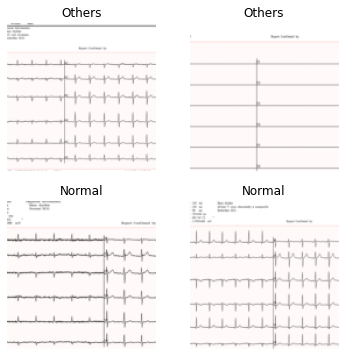

In [41]:
dls.show_batch()

In [42]:
# def label_func_dummy(fname):
#     df_temp = df_training_labels[df_training_labels['image_name'] == Path(fname).name].reset_index()
#     if df_temp.shape[0] == 0:
#         ret_val = "not found"
#     else:
#         ret_val = df_temp.iloc[0]['choice']
#     return (ret_val)

In [43]:
! pip install pillow==8.2

In [44]:
# dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
#                    get_items = get_training_files,
#                    get_y     = label_func_dummy,
#                    item_tfms = RandomResizedCrop(128, min_scale=0.35)
#                   )
# # Error was happening because of Pillow version, using 8.2 has resolved the problem.
# dls = dblock.dataloaders('./ecg-annotated-data')
# dls.show_batch()

In [45]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(1)
learn.export("model2-dec-2021.pkl")
learn.model_dir

epoch,train_loss,valid_loss,error_rate,time
0,1.928624,1.805565,0.603448,00:52


'models'

In [50]:
learn.export('/home/ec2-user/SageMaker/model2-dec-2021.pkl')

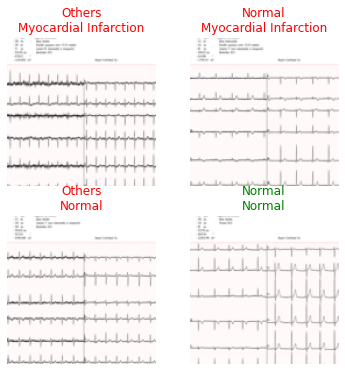

In [51]:
learn.show_results()

['001', '.ipynb_checkpoints']

In [ ]:
# Carry on from here if this succeeds.

In [29]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.043683,2.240408,0.827586,01:08
1,1.922872,2.002335,0.741379,01:08
2,1.940283,1.825010,0.775862,01:08
3,1.897669,1.699069,0.741379,01:09
4,1.832176,1.784493,0.655172,01:08
5,1.747566,1.830985,0.603448,01:08
6,1.729184,1.803873,0.620690,01:09
7,1.698413,1.732428,0.586207,01:09
8,1.659874,1.636885,0.534483,01:09
9,1.639619,1.610919,0.517241,01:08


In [31]:
learn.export("model-dec-2021-error-rate-40.pkl")

In [32]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.388480,1.191831,0.413793,01:09
1,1.370766,1.138900,0.465517,01:08
2,1.423645,1.068126,0.379310,01:09
3,1.392396,1.016986,0.396552,01:09
4,1.413720,0.938192,0.396552,01:08
5,1.384523,0.882226,0.362069,01:08
6,1.349160,0.863495,0.310345,01:09
7,1.318636,0.881680,0.310345,01:08
8,1.310979,0.877679,0.310345,01:09
9,1.293891,0.872105,0.327586,01:08


In [33]:
learn.export("model-dec-2021-error-rate-32.pkl")

In [34]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.128955,0.844942,0.310345,01:09
1,1.199019,0.837563,0.310345,01:08
2,1.222853,0.826472,0.310345,01:08
3,1.238631,0.820045,0.293103,01:09
4,1.214718,0.862322,0.293103,01:08
5,1.196497,0.878759,0.327586,01:08
6,1.197821,0.900859,0.344828,01:08
7,1.229720,0.879538,0.327586,01:08
8,1.222292,0.856317,0.310345,01:08
9,1.228256,0.868595,0.362069,01:09


In [35]:
learn.export("model-dec-2021-error-rate-36.pkl")

In [6]:
## Done upto here.

In [99]:
# shutil.rmtree("./ecg-200-files")
# os.makedirs("./ecg-200-files")

In [36]:
IMAGE_DIR =  './ecg-annotated-data'

In [37]:
df_training_labels.head()

,index,image,id,choice,comment,annotator,annotation_id,created_at,updated_at,lead_time,labels,image_name
0,0,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201103-090540-1035.pdf.jpg,3598,Normal,ST changes in v2 and v3 is normal variant,ashadevi.jagarlamudi@hcl.com,312,2021-10-13T13:13:16.535981Z,2021-10-13T13:13:50.686726Z,435273.940,Normal,20201103-090540-1035.pdf.jpg
1,1,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201014-075943-977.pdf.jpg,3580,Others,"{""text"": [""Fascicular block is evident. "", ""Non specific T wave changes. Have to look in to patients history.""]}",ashadevi.jagarlamudi@hcl.com,294,2021-10-11T16:10:12.062425Z,2021-10-11T16:10:37.532522Z,273077.032,Others,20201014-075943-977.pdf.jpg
2,2,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201104-114447-1041.pdf.jpg,3577,Others,"T wave flattening in inferior leads, it is non specific finding.",ashadevi.jagarlamudi@hcl.com,291,2021-10-11T16:05:37.430058Z,2021-10-11T16:06:25.680923Z,272825.178,Others,20201104-114447-1041.pdf.jpg
3,3,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201201-124218-1205.pdf.jpg,3530,Others,Low Voltage in the EKG. This could be suggesting infiltrative cardiomyopathy,ashadevi.jagarlamudi@hcl.com,244,2021-10-08T13:03:48.405205Z,2021-10-08T13:03:54.071083Z,2674.445,Others,20201201-124218-1205.pdf.jpg
4,6,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20210128-134038-66.pdf.jpg,3390,Normal,NaN,ashadevi.jagarlamudi@hcl.com,93,2021-09-08T18:54:51.617102Z,2021-09-08T18:59:08.073580Z,23495.349,Normal,20210128-134038-66.pdf.jpg


In [38]:
label_func('20201201-124218-1205.pdf.jpg')

'Others'

In [39]:
label_func('20201103-090540-1035.pdf.jpg')

'Normal'

In [40]:
files = ft
files[0]

Path('ecg-annotated-data/20201119-074853-1177.pdf.jpg')

In [41]:
len(files)

291

In [42]:
learn.model_dir

'models'

In [ ]:
# Testing time on unseen data.

In [ ]:
### DELETE TILL HERE ###

In [23]:
mdl = load_learner("model-dec-2021-error-rate-32.pkl")

In [24]:
mdl

In [25]:
test_local_files = Path('./ecg-annotated-data/').ls()

In [26]:
test_local_files

(#358) [Path('ecg-annotated-data/20201119-074853-1177.pdf.jpg'),Path('ecg-annotated-data/20210129-144725-146.pdf.jpg'),Path('ecg-annotated-data/20210128-123724-51.pdf.jpg'),Path('ecg-annotated-data/20210128-163817-102.pdf.jpg'),Path('ecg-annotated-data/20210103-113733-218.pdf.jpg'),Path('ecg-annotated-data/20201209-125928-137.pdf.jpg'),Path('ecg-annotated-data/20210128-155452-90.pdf.jpg'),Path('ecg-annotated-data/20201216-034049-170.pdf.jpg'),Path('ecg-annotated-data/20210108-162942-231.pdf.jpg'),Path('ecg-annotated-data/20210128-164747-105.pdf.jpg')...]

In [27]:
out = mdl.predict(test_local_files[0])

RuntimeError: Could not infer dtype of PILImage

In [48]:
out[0]

'Others'

In [49]:
out[2].numpy().max()

0.6883579

In [50]:
test_local_files[0].name

'20201119-074853-1177.pdf.jpg'

In [56]:
test_local_files[356]

Path('ecg-annotated-data/20201218-102734-180.pdf.jpg')

In [74]:
def get_test_prediction(fl):
  d = {}
  try:
      
      out = mdl.predict(fl)
      d['image_name'] = fl.name
      d['predict_label'] = out[0]
      d['predict_prob'] = out[2].numpy().max()
  except:
    pass
  return( d )
test_predicted = list(map(get_test_prediction, test_local_files))

In [75]:
df_res = pd.DataFrame(test_predicted)

In [76]:
df_res.head()

,image_name,predict_label,predict_prob
0,20201119-074853-1177.pdf.jpg,Others,0.688358
1,20210129-144725-146.pdf.jpg,Normal,0.480392
2,20210128-123724-51.pdf.jpg,Others,0.682743
3,20210128-163817-102.pdf.jpg,Others,0.368411
4,20210103-113733-218.pdf.jpg,Normal,0.484686


In [77]:
df_res.shape

(358, 3)

In [78]:
df_training_labels.head()

,index,image,id,choice,comment,annotator,annotation_id,created_at,updated_at,lead_time,labels,image_name
0,0,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201103-090540-1035.pdf.jpg,3598,Normal,ST changes in v2 and v3 is normal variant,ashadevi.jagarlamudi@hcl.com,312,2021-10-13T13:13:16.535981Z,2021-10-13T13:13:50.686726Z,435273.940,Normal,20201103-090540-1035.pdf.jpg
1,1,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201014-075943-977.pdf.jpg,3580,Others,"{""text"": [""Fascicular block is evident. "", ""Non specific T wave changes. Have to look in to patients history.""]}",ashadevi.jagarlamudi@hcl.com,294,2021-10-11T16:10:12.062425Z,2021-10-11T16:10:37.532522Z,273077.032,Others,20201014-075943-977.pdf.jpg
2,2,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201104-114447-1041.pdf.jpg,3577,Others,"T wave flattening in inferior leads, it is non specific finding.",ashadevi.jagarlamudi@hcl.com,291,2021-10-11T16:05:37.430058Z,2021-10-11T16:06:25.680923Z,272825.178,Others,20201104-114447-1041.pdf.jpg
3,3,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20201201-124218-1205.pdf.jpg,3530,Others,Low Voltage in the EKG. This could be suggesting infiltrative cardiomyopathy,ashadevi.jagarlamudi@hcl.com,244,2021-10-08T13:03:48.405205Z,2021-10-08T13:03:54.071083Z,2674.445,Others,20201201-124218-1205.pdf.jpg
4,6,/data/local-files/?d=home/ubuntu/labeling/ecg-all/20210128-134038-66.pdf.jpg,3390,Normal,NaN,ashadevi.jagarlamudi@hcl.com,93,2021-09-08T18:54:51.617102Z,2021-09-08T18:59:08.073580Z,23495.349,Normal,20210128-134038-66.pdf.jpg


In [79]:
df_consolidated_results = pd.merge(df_training_labels, df_res, on = ["image_name"])[['image_name', 'choice', 'predict_label']]

In [80]:
df_consolidated_results = df_consolidated_results.rename(columns =  {"choice": "actual_label", "image_name": "file"})

In [81]:
df_consolidated_results

,file,actual_label,predict_label
0,20201103-090540-1035.pdf.jpg,Normal,Normal
1,20201014-075943-977.pdf.jpg,Others,Myocardial Infarction
2,20201104-114447-1041.pdf.jpg,Others,Normal
3,20201201-124218-1205.pdf.jpg,Others,Myocardial Infarction
4,20210128-134038-66.pdf.jpg,Normal,Normal
...,...,...,...
286,20201029-090143-1022.pdf.jpg,Others,Others
287,20200911-100026-874.pdf.jpg,Normal,Normal
288,20201021-073749-1000.pdf.jpg,Normal,Normal
289,20200930-165410-935.pdf.jpg,Myocardial Infarction,Normal


In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

                       precision    recall  f1-score   support

Myocardial Infarction       0.19      0.30      0.23        20
               Normal       0.76      0.71      0.74       182
               Others       0.53      0.53      0.53        89

             accuracy                           0.63       291
            macro avg       0.49      0.51      0.50       291
         weighted avg       0.65      0.63      0.64       291



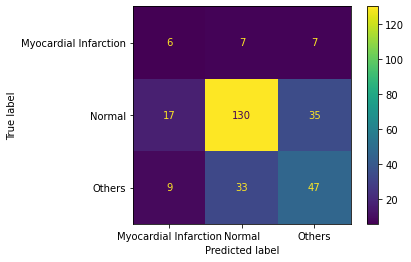

In [83]:
matrix = confusion_matrix(df_consolidated_results['actual_label'],df_consolidated_results['predict_label'])
cr = classification_report(y_true = df_consolidated_results['actual_label']
                      ,y_pred = df_consolidated_results['predict_label'])

print(cr)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=mdl.dls.vocab)
disp.plot() 